In [1]:
#from utils import load_data, MidpointNormalize, equipotential_standard_normal, plot_heatmaps
import sys
wd = '/local_scratch.old/zabel/tsne/diss'
sys.path.insert(0, wd)

import pandas as pd
import seaborn as sns

from tsne_jax import *

from utils import *
import matplotlib.pyplot as plt
#import tikzplotlib
import jax

from tueplots import cycler, fonts, fontsizes, bundles
from tueplots.constants import markers
from tueplots.constants.color import palettes

import scipy

plt.rcParams.update(cycler.cycler(color=palettes.tue_plot))
plt.rcParams.update(fonts.aistats2022_tex(family="serif"))
plt.rcParams.update(fontsizes.aistats2022())
plt.rcParams['axes.grid'] = False


### Load matrices generated in R

In [2]:
mean = pd.read_csv('/local_scratch.old/zabel/tsne/diss/datasets/Scoelicolor/mean.txt')
cov1 = pd.read_csv('/local_scratch.old/zabel/tsne/diss/datasets/Scoelicolor/cov1.txt')
N = np.array(cov1.values)
cov2 = pd.read_csv('/local_scratch.old/zabel/tsne/diss/datasets/Scoelicolor/cov2.txt')
D = np.array(cov2.values)
print(mean.shape, cov1.shape, cov2.shape)


(8, 50) (8, 8) (50, 50)


In [3]:
labels = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8',]

In [23]:
X = scipy.stats.matrix_normal.rvs(mean, cov1, cov2)
#X, y = load_data(10)
key = random.PRNGKey(42)

y_guess = random.normal(key, shape=(X.shape[0], 2))

Y_star = tsne_fwd(X, y_guess)

X_flat, X_unflattener = flatten_util.ravel_pytree(np.array(X))   # row-wise
Y_flat, Y_unflattener = flatten_util.ravel_pytree(Y_star)


Perplexity value 30 is too high. Using perplexity 2.33 instead


===> Finding 7 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 1.5696, 50 iterations in 1.0833 sec
Iteration  100, KL divergence 1.3486, 50 iterations in 0.7951 sec
Iteration  150, KL divergence 1.0705, 50 iterations in 0.6387 sec
Iteration  200, KL divergence 1.7616, 50 iterations in 0.5384 sec
Iteration  250, KL divergence 0.7645, 50 iterations in 0.5365 sec
   --> Time elapsed: 3.59 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 750 iterations...
Iteration   50, KL divergence 0.9017, 50 iterations in 0.5343 sec
Iteration  100, KL divergence 1.5698, 50 iterations in 0.5367 sec
Iteration  150, KL divergence 0.7801, 50 iterations in 0.5361 sec
Iteration  200, KL divergence 0.8304, 50 iterations in 0.5359 sec
Iteration  

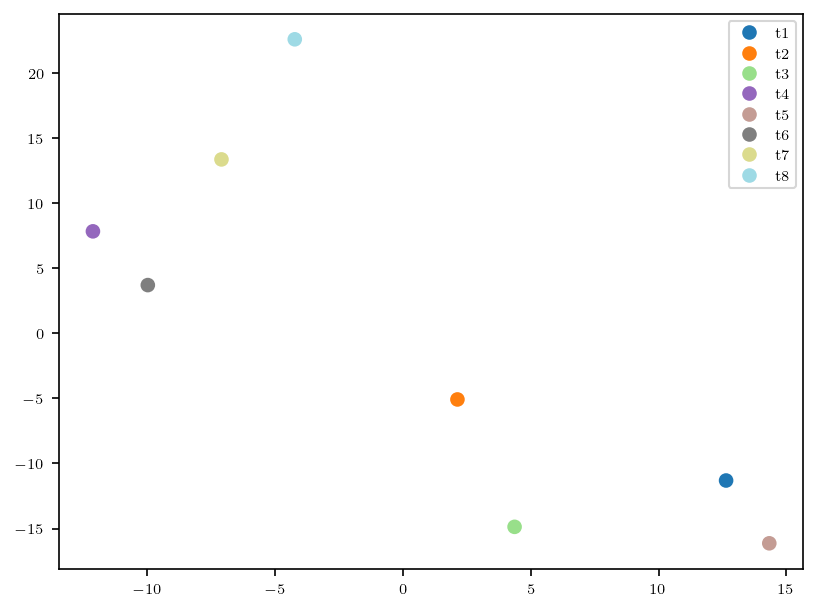

In [24]:
f = plt.figure()
scatter = plt.scatter(*Y_star.T, c = [i for i in range(Y_star.shape[0])], cmap = 'tab20')
plt.legend(handles=scatter.legend_elements(num=8)[0], labels=labels)


In [25]:
cov_final = compute_cov(X_flat, Y_flat, X_unflattener, Y_unflattener, D, N, 2.33)
cov_final = cov_final + 1e-3*np.eye(len(cov_final))

<Axes: >

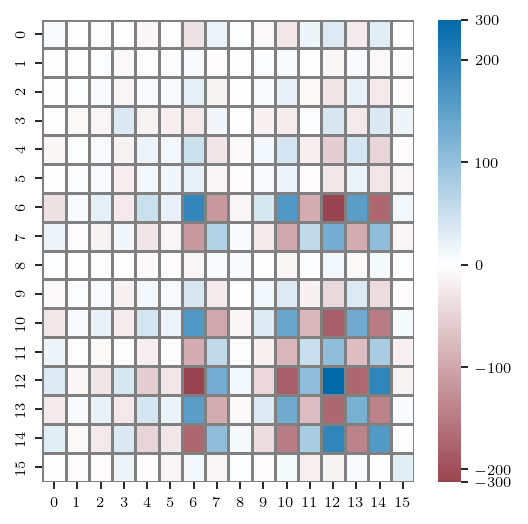

In [26]:
plot_heatmap(cov_final, figsize=(4, 4))

In [27]:
print(np.max(cov_final))

239.3997


In [28]:
from utils import equipotential_standard_normal_within_one_std

S = equipotential_standard_normal_within_one_std(2 * Y_star.shape[0], 20)
L, lower = jax.scipy.linalg.cho_factor(cov_final + 1e-3*np.identity(cov_final.shape[0]), lower=True)
samples = np.transpose(np.transpose(np.dot(L, S))+Y_flat)

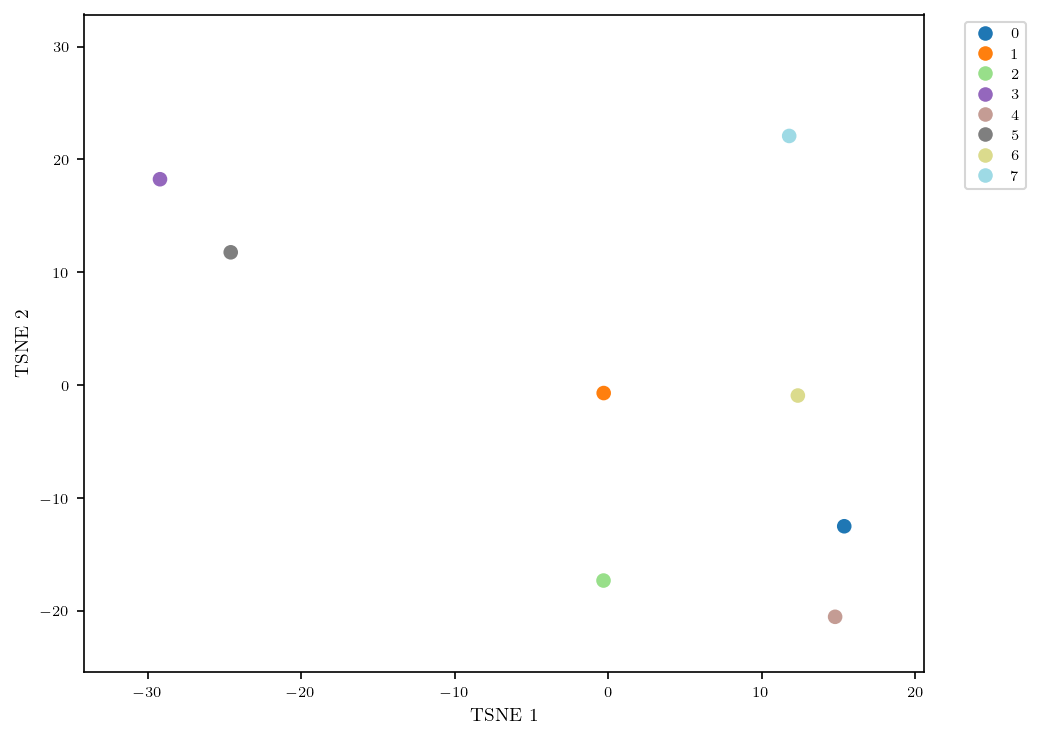

In [29]:
from animate_ifd import *
animate(samples, [i for i in range(Y_star.shape[0])], '/local_scratch.old/zabel/tsne/diss/datasets/Scoelicolor/animation.gif', cmap='tab20')

(16, 20)


Text(0, 0.5, 'TSNE 2')

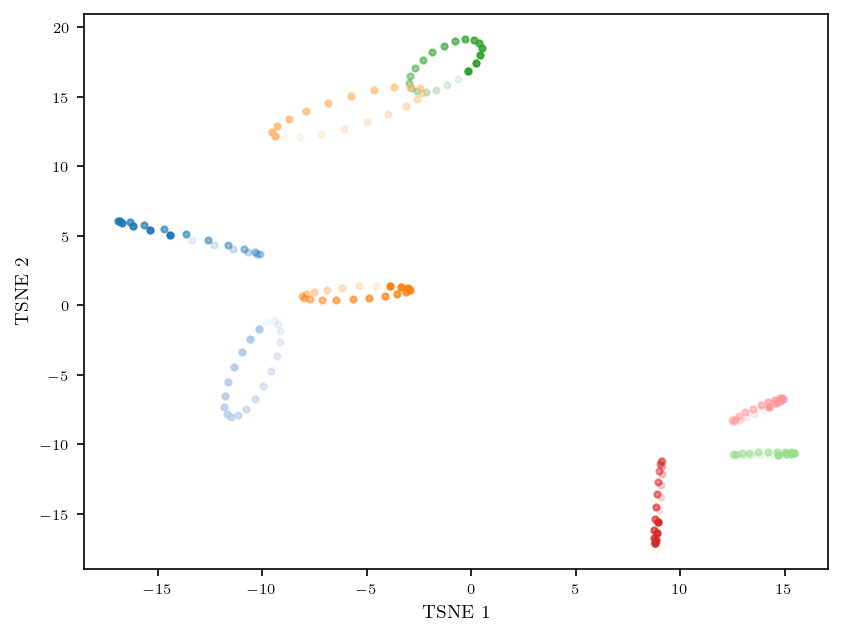

In [11]:
import matplotlib.pyplot as plt
# Get the tab20 colormap
tab20 = plt.get_cmap('tab20')

# Extract colors as a list of RGB tuples
colors = [tab20(i) for i in range(tab20.N)]

n_samples = 20
y_int = [i for i in range(Y_star.shape[0])]
S = equipotential_standard_normal_within_one_std(2 * Y_star.shape[0], n_samples)
L, lower = jax.scipy.linalg.cho_factor(cov_final, lower=True)
samples = np.transpose(np.transpose(np.dot(L, S))+Y_flat)
print(samples.shape)

fig = plt.figure()
for j, sample in enumerate(samples.T):
    sample = Y_unflattener(sample)
    for i, s in enumerate(sample): 
        plt.plot(s[0], s[1], c=colors[i], alpha=[i for i in np.arange(0.1, 1, 1/(n_samples+2))][j], marker='.')
               #marker=list(Line2D.markers.keys())[j])
#plt.axis('equal')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')

In [12]:
selected_data = pd.read_csv('/local_scratch.old/zabel/tsne/diss/datasets/Scoelicolor/selected_data.txt')
selected_data = selected_data.values
#labels = pd.read_csv('datasets/Thcells/labels.txt', header=None)
#labels = labels.values.flatten().tolist()
key = random.PRNGKey(41)
#X = onp.array(random.normal(key, shape=(50, 50)))
y_guess = random.normal(key, shape=(selected_data.shape[0], 2))
#Y_star = TSNE(n_components=2, learning_rate=200, init=onp.array(y_guess), perplexity=30).fit_transform(X)
selected_data_tsne = tsne_fwd(selected_data, y_guess)

Perplexity value 30 is too high. Using perplexity 7.67 instead


===> Finding 23 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 1.0135, 50 iterations in 1.0234 sec
Iteration  100, KL divergence 0.9203, 50 iterations in 0.8466 sec
Iteration  150, KL divergence 1.0570, 50 iterations in 0.6577 sec
Iteration  200, KL divergence 0.8331, 50 iterations in 0.6493 sec
Iteration  250, KL divergence 0.9653, 50 iterations in 0.6647 sec
   --> Time elapsed: 3.84 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 750 iterations...
Iteration   50, KL divergence 0.3509, 50 iterations in 0.6724 sec
Iteration  100, KL divergence 0.0403, 50 iterations in 0.6510 sec
Iteration  150, KL divergence 0.0389, 50 iterations in 0.6505 sec
Iteration  200, KL divergence 0.0390, 50 iterations in 0.6488 sec
Iteration 

['t1', 't1', 't1', 't2', 't2', 't2', 't3', 't3', 't3', 't4', 't4', 't4', 't5', 't5', 't5', 't6', 't6', 't6', 't7', 't7', 't7', 't8', 't8', 't8']


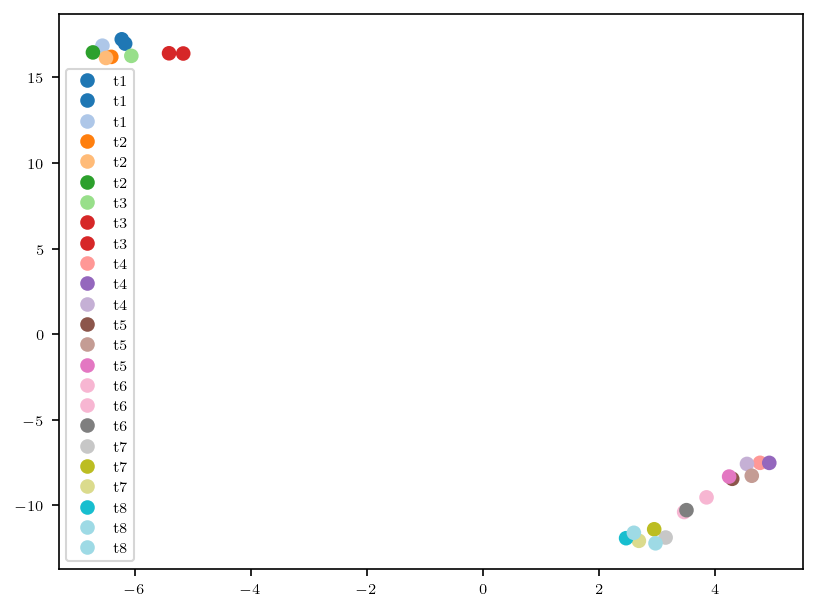

In [13]:
labels_selected = [[i, i, i]for i in labels]
labels_selected = list(np.array(labels_selected).flatten())
print(labels_selected)

f = plt.figure()
scatter = plt.scatter(*selected_data_tsne.T, c = [i for i in range(selected_data_tsne.shape[0])], cmap = 'tab20')
plt.legend(handles=scatter.legend_elements(num=24)[0], labels=labels_selected)
